(aleatory_propagation)=
# Propagation of aleatory uncertainty

Aleatory uncertainty is also called randomness, objective uncertainty, dissonance, or irreducible uncertainty arised from natural stochasticity, environmental or structural variation across space or through time. It is most commonly represented by probability distributions. 

In propagating such uncertainties, one can either approximate the statistical moments of a propagating function or yield the whole output distribution. Such needs are common in [engineering reliability analyses](https://www.researchgate.net/publication/333990695_New_collocation_method_for_stochastic_response_surface_reliability_analyses). This notebook will demonstrate how these two methods can be easily done using `pyuncertainnumber` and one can compare the respective results.

```{seealso}
There is an increasing awareness, among the scientific computation community, of the differentiation of aleatory and epistemic uncertainty and that different methods are needed for characterisation and propagation. See {ref}`epistemic_propagation` for the propagation of epistemic uncertainty and more realistically {ref}`mix_propagation` for a mixed situation.
```

In [1]:
import pyuncertainnumber as pun
from pyuncertainnumber import pba
import jax.numpy as jnp
import numpy as np
import seaborn as sns

In [2]:
# a multivariate function for propation purpose
def bar(x):

    if isinstance(x, np.ndarray):  # vectorised signature
        if x.ndim == 1:
            x = x[None, :]
        return x[:, 0]**2 + x[:, 1] + 3
    else:
        return x[0]**2 + x[1] + 3  # iterable signature

## Taylor expansion for moment propagation

For simplicity, the moments of a function of random variables can be approximately by [Taylor expansions](https://en.wikipedia.org/wiki/Taylor_expansions_for_the_moments_of_functions_of_random_variables), assuming that the function is sufficiently differentiable and moments are finite.

In [3]:
MEAN = jnp.array([3., 2.5])
COV = jnp.array([[4, 0.3], [0.3, 0.25]])

mu_, var_ = pun.taylor_expansion_method(func=bar, mean=MEAN, cov=COV)

In [4]:
print(f"mean of the function: {mu_}")
print(f"variance of the function: {var_:.2f}")

mean of the function: 18.5
variance of the function: 179.85


## Monte Carlo simulation

Alternatively, if one is instead interested in the whole distribution of the output quantity, a popular method is to sample though at the cost of many function evaluations. 

It should be noted that Monte Carlo simulation can only be done with a known dependency between the random vector. While it is attempting to assume independence, however, it is the bad practice without justification, see xxx for more explantion.

```{tip}
any other marginal distributions and copula structure can be used.
```

In [5]:
depen_ = pba.Dependency("independence", k_dim=2)

x0 = pba.D("gaussian", (3., 2))
x1 = pba.D("gaussian", (2.5, 0.5))

In [10]:
# create a JointDistribution object
j = pba.JointDistribution(
    copula=depen_,
    marginals= [x0, x1],
)

s_inputs = j.sample(10000)
s_y = bar(s_inputs)

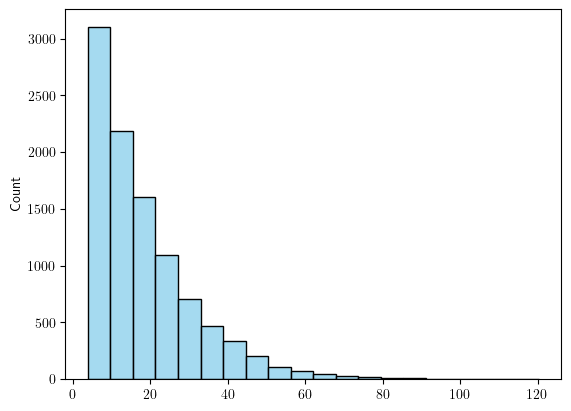

In [13]:
_ = sns.histplot(s_y, bins=20, kde=False, color="skyblue")

In [15]:
print(f"mean of the function: {s_y.mean():.2f}")
print(f"variance of the function: {s_y.var():.2f}")

mean of the function: 18.52
variance of the function: 177.45
